In [1]:
import os

In [2]:
img_folder_list = os.listdir('./data/til_1226')
img_folder_list

['car.jpg']

In [3]:
import glob # 경로 가져오는 모듈

img_path = glob.glob('./data/til_1226/*.jpg') # 이미지폴더내 모든 이미지파일 경로
img_path

['./data/til_1226\\car.jpg']

In [4]:
# 파일명 잘라오기
def file_name(path):
    name = path.split('\\')[1]
    return name

In [5]:
import cv2

class ImageProcessor:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)

    def rotate_image(self, angle):
        # 이미지 회전
        rows, cols, _ = self.image.shape
        rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        self.image = cv2.warpAffine(self.image, rotation_matrix, (cols, rows))

    def flip_image(self, flip_code):
        # 이미지 좌우, 상하 반전
        self.image = cv2.flip(self.image, flip_code)

    def save_image(self, output_path):
        # 처리된 이미지 저장
        cv2.imwrite(output_path, self.image)    

In [6]:
if __name__ == "__main__":
    
    output_image_path = './data/til_1226'
    
    if not os.path.exists(output_image_path):
        os.mkdir(output_image_path)

    # 이미지를 처리하는 ImageProcessor 인스턴스 생성
    for path in img_path:
        # 출력 이미지 이름
        name = file_name(path)      
        
        # 이미지를 90도 회전
        processor = ImageProcessor(path)
        processor.rotate_image(-90)
        processor.save_image(output_image_path+'/90_'+name)
        
        # 이미지를 상하
        processor = ImageProcessor(path)
        processor.flip_image(0)
        processor.save_image(output_image_path+'/yflip_'+name)

        # 이미지를 좌우로 반전
        processor = ImageProcessor(path)
        processor.flip_image(1) 
        processor.save_image(output_image_path+'/xflip_'+name)
        

In [7]:
img_path = glob.glob('./data/til_1226/*.jpg') # 이미지폴더내 모든 이미지파일 경로
img_path

['./data/til_1226\\90_car.jpg',
 './data/til_1226\\car.jpg',
 './data/til_1226\\xflip_car.jpg',
 './data/til_1226\\yflip_car.jpg']

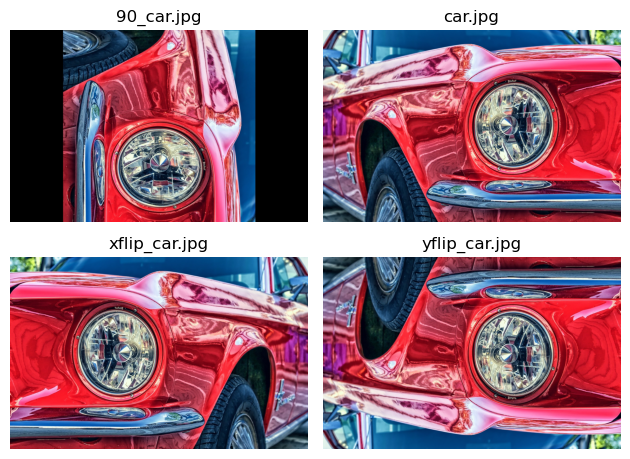

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 더 간단하게
rows = 2
cols = 2

#fig, axes = plt.subplots(rows, cols, figsize=(10,10))
fig, axes = plt.subplots(rows, cols)
axes = axes.ravel()

i = 0
for path in img_path:
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image_rgb)
    axes[i].set_title(file_name(path))
    axes[i].axis('off')
    i+=1
    
plt.tight_layout()
plt.show()